인공신경망 part

In [ ]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
print(train_input.shape)
print(train_target.shape)

In [ ]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(1,10,figsize = (10,10))
for i in range(10):
    axis[i].imshow(train_input[i],cmap = 'gray')
    axis[i].axis('off')
plt.show()

In [ ]:
import numpy as np
print(np.unique(train_target,return_counts=True))

In [ ]:
#0부터255까지의 정숫값으로 각 픽셀이 나타나므로 255로 나누어주면서 정규화시킨다
train_scaled = train_input/255
print(train_scaled.shape)
#첫번째 차원(데이터갯수)는 변하지 않고 원본데이터의 두번째 세번째 데이터의 차원이 1차원으로 합쳐진다
train_scaled = train_scaled.reshape(-1,28*28)
print(train_scaled.shape)

In [ ]:
#모델은 sgdclassifier loss function은 log 함수
#교차검증으로 점수를 대충 예측해보기
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
sc=SGDClassifier(loss='log',max_iter=5,random_state=42)
score = cross_validate(sc,train_scaled,train_target,n_jobs=-1)
print(np.mean(score['test_score']))

In [ ]:
#이제 DNN을 만들거야
import numpy as np
from sklearn.model_selection import train_test_split
#data = keras.datasets.fashion_mnist.load_data() #이 방법은 tuple 형태로 받아오기 때문에 어쩔 수 없이 train test로 나누어 받는다
#어쩔수 없이 받은 train test로 나뉜 데이터를 합치기
#먼저 list로 된 target 데이터를 합치기 위해 numpy로 전환
train_target = np.array(train_target)
test_target = np.array(test_target)
#데이터 한번더 reshape해주기
train_target = train_target.reshape(-1)
test_target = test_target.reshape(-1)
#열 합치기 axis=0
combined_data = np.concatenate((train_input, test_input), axis=0)
combined_target = np.concatenate((train_target, test_target), axis=0)
reshaped_data = combined_data.reshape(-1, 28*28)
scaled_data = reshaped_data / 255

train_scaled,test_scaled,train_target,test_target = train_test_split(scaled_data,combined_target,test_size=0.4,random_state=42)
print(train_scaled.shape)
print(test_scaled.shape)
dense = keras.layers.Dense(10,activation='softmax',input_shape=(784,))# 10은 뉴런의 갯수 784는 입력의 크기
model = keras.Sequential(dense)





In [ ]:
#원핫인코딩을 통해서 정수로 된 target의 값들을 해당값만 1 나머지는 0으로 보냄으로써
#나머지는 계산하지 않고 해당 데이터에 대한 확률만 남기는 방법을 쓴다
#아래는 원핫인코딩을 하지 않아도 정수로 된 타깃값을 사용해 크로스 엔트로피 손실을 계산 할 수 있도록 해준다.
model.compile(loss='sparse_categorical_crossentropy',metrics = 'accuracy')
model.fit(train_scaled,train_target,epochs=10)

In [ ]:
#compile 메서드에서 정한 loss 매개변수와 metrics 에 해당하는 값이 출력된다
model.evaluate(test_scaled,test_target)

In [ ]:
#은닉층 생성
model = keras.Sequential([
    keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),name = 'hidden_layer'),
    keras.layers.Dense(10,activation='softmax',name = 'output_layer')],name = 'fashion mnist 모델')
model.summary()#output shape 이 none 이라고 뜨는것은 mini-batch를 사용할 것이기 때문에 아직 모른다


In [ ]:
#더 쉬운 버전
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),name = 'hidden_layer'))
model.add(keras.layers.Dense(10,activation='softmax',name = 'output_layer'))
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs =5)

In [ ]:
#keras에서는flatten을 적용하여 데이터를 reshape 할 수 있다
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
#optimizer안에도 하이퍼파라미터들을 새로 지정해준다
#특히 nesterov는 모멘텀 최적화를 두번 반복하여 구현하므로 
#최적점에 가까이 갈수록 학습률을 낮출 수 있다->적응적 학습률
#sgd = keras.optimizers.SGD(learning_rate=0.1,nesterov=0.9)
#adam은 adafrad = keras.optimizers.Adagrad() 와 rmsprop = keras.optimizers.RMSprop()을 합친것
adam = keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer=adam)
model.fit(train_scaled,train_target,epochs =5)
model.evaluate(test_scaled,test_target)

Epoch 1/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.5958 - accuracy: 0.7906 - val_loss: 0.4274 - val_accuracy: 0.8465
Epoch 2/20
1532/1532 [==============================] - 4s 3ms/step - loss: 0.4440 - accuracy: 0.8398 - val_loss: 0.3831 - val_accuracy: 0.8586
Epoch 3/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.4092 - accuracy: 0.8528 - val_loss: 0.4090 - val_accuracy: 0.8455
Epoch 4/20
1532/1532 [==============================] - 4s 3ms/step - loss: 0.3868 - accuracy: 0.8598 - val_loss: 0.3581 - val_accuracy: 0.8666
Epoch 5/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.3746 - accuracy: 0.8626 - val_loss: 0.3479 - val_accuracy: 0.8694
Epoch 6/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.3619 - accuracy: 0.8676 - val_loss: 0.3399 - val_accuracy: 0.8747
Epoch 7/20
1532/1532 [==============================] - 4s 3ms/step - loss: 0.3539 - accuracy: 0.8716 - val_loss: 0.3419 - val_accuracy:

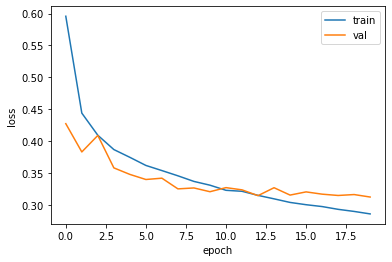

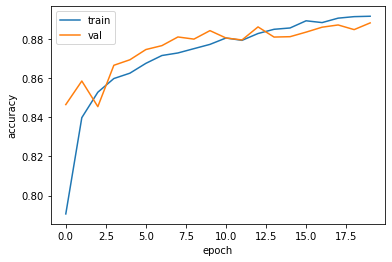

In [6]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
combined_data = np.concatenate((train_input, test_input), axis=0)
combined_target = np.concatenate((train_target, test_target), axis=0)
reshaped_data = combined_data.reshape(-1, 28*28)
scaled_data = reshaped_data / 255


#함수형태로 만들기
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

train_scaled,test_scaled,train_target,test_target = train_test_split(scaled_data,combined_target,test_size=0.3,random_state=42)
model = model_fn(keras.layers.Dropout(0.3))#드롭아웃 기법 추가
#중요한건 테스트나 예측을 수행할때는 드롭아웃을 사용하지 말아야 한다 훈련할 때만 사용 -> keras 에서 알아서 함
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')
#모델과 파라미터 값들을 저장하는 것
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
#earlystopping 을 사용하는데 파라미터 값에 따라 patience값 동안 연속으로 검증점수가 향상되지 않으면 종료한다
#restore_best_weights를 true해놓으면 가장 좋았던 값으로 다시 돌아가 저장한다.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs =20,validation_data=(test_scaled,test_target),callbacks=[checkpoint_cb,early_stopping_cb])
print(early_stopping_cb.stopped_epoch)
print(history.history.keys())

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()
model.evaluate(train_target,test_target)